# Dataset

My dataset link broken so I need to renewed it.

You can download original link:

`https://lcas.lincoln.ac.uk/wp/research/data-sets-software/crop-vs-weed-discrimination-dataset/`

In [ ]:
!if [ ! -d "CA17" ]; then wget https://yildizozan-dataset.s3.eu-central-1.amazonaws.com/CA17.zip; fi

--2021-02-04 15:42:59--  https://yildizozan-dataset.s3.eu-central-1.amazonaws.com/CA17.zip
Resolving yildizozan-dataset.s3.eu-central-1.amazonaws.com (yildizozan-dataset.s3.eu-central-1.amazonaws.com)... 52.219.74.176
Connecting to yildizozan-dataset.s3.eu-central-1.amazonaws.com (yildizozan-dataset.s3.eu-central-1.amazonaws.com)|52.219.74.176|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-02-04 15:43:00 ERROR 404: Not Found.



In [ ]:
!unzip -n CA17.zip

Streaming output truncated to the last 5000 lines.
 extracting: CA17/train/01_rgbreg_crop_04_08.png  
 extracting: CA17/train/01_rgbreg_crop_05_00.png  
 extracting: CA17/train/01_rgbreg_crop_05_01.png  
 extracting: CA17/train/01_rgbreg_crop_05_02.png  
 extracting: CA17/train/01_rgbreg_crop_05_03.png  
 extracting: CA17/train/01_rgbreg_crop_05_04.png  
 extracting: CA17/train/01_rgbreg_crop_05_05.png  
 extracting: CA17/train/01_rgbreg_crop_05_06.png  
 extracting: CA17/train/01_rgbreg_crop_05_07.png  
 extracting: CA17/train/01_rgbreg_crop_05_08.png  
 extracting: CA17/train/01_rgbreg_crop_06_00.png  
 extracting: CA17/train/01_rgbreg_crop_06_01.png  
 extracting: CA17/train/01_rgbreg_crop_06_02.png  
 extracting: CA17/train/01_rgbreg_crop_06_03.png  
 extracting: CA17/train/01_rgbreg_crop_06_04.png  
 extracting: CA17/train/01_rgbreg_crop_06_05.png  
 extracting: CA17/train/01_rgbreg_crop_06_06.png  
 extracting: CA17/train/01_rgbreg_crop_06_07.png  
 extracting: CA17/train/01_rgbr

In [ ]:
def decode_segmap(image, nc=3):
  
  label_colors = np.array([#1=soil, 
                           (0, 0, 0), (255, 0, 0), (0, 255, 0), (0, 0, 255)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  return rgb

# Model

In [ ]:
##################################################################################
#SegNet: A Deep Convolutional Encoder-Decoder Architecture for Image Segmentation
#Paper-Link: https://arxiv.org/pdf/1511.00561.pdf
##################################################################################


import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary



__all__ = ["SegNet"]

class SegNet(nn.Module):
    def __init__(self,classes):
        super(SegNet, self).__init__()

        batchNorm_momentum = 0.1

        self.conv11 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn11 = nn.BatchNorm2d(64, momentum= batchNorm_momentum)
        self.conv12 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn12 = nn.BatchNorm2d(64, momentum= batchNorm_momentum)

        self.conv21 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn21 = nn.BatchNorm2d(128, momentum= batchNorm_momentum)
        self.conv22 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn22 = nn.BatchNorm2d(128, momentum= batchNorm_momentum)

        self.conv31 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn31 = nn.BatchNorm2d(256, momentum= batchNorm_momentum)
        self.conv32 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn32 = nn.BatchNorm2d(256, momentum= batchNorm_momentum)
        self.conv33 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn33 = nn.BatchNorm2d(256, momentum= batchNorm_momentum)

        self.conv41 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.bn41 = nn.BatchNorm2d(512, momentum= batchNorm_momentum)
        self.conv42 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn42 = nn.BatchNorm2d(512, momentum= batchNorm_momentum)
        self.conv43 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn43 = nn.BatchNorm2d(512, momentum= batchNorm_momentum)

        self.conv51 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn51 = nn.BatchNorm2d(512, momentum= batchNorm_momentum)
        self.conv52 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn52 = nn.BatchNorm2d(512, momentum= batchNorm_momentum)
        self.conv53 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn53 = nn.BatchNorm2d(512, momentum= batchNorm_momentum)

        self.conv53d = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn53d = nn.BatchNorm2d(512, momentum= batchNorm_momentum)
        self.conv52d = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn52d = nn.BatchNorm2d(512, momentum= batchNorm_momentum)
        self.conv51d = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn51d = nn.BatchNorm2d(512, momentum= batchNorm_momentum)

        self.conv43d = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn43d = nn.BatchNorm2d(512, momentum= batchNorm_momentum)
        self.conv42d = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn42d = nn.BatchNorm2d(512, momentum= batchNorm_momentum)
        self.conv41d = nn.Conv2d(512, 256, kernel_size=3, padding=1)
        self.bn41d = nn.BatchNorm2d(256, momentum= batchNorm_momentum)

        self.conv33d = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn33d = nn.BatchNorm2d(256, momentum= batchNorm_momentum)
        self.conv32d = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn32d = nn.BatchNorm2d(256, momentum= batchNorm_momentum)
        self.conv31d = nn.Conv2d(256,  128, kernel_size=3, padding=1)
        self.bn31d = nn.BatchNorm2d(128, momentum= batchNorm_momentum)

        self.conv22d = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn22d = nn.BatchNorm2d(128, momentum= batchNorm_momentum)
        self.conv21d = nn.Conv2d(128, 64, kernel_size=3, padding=1)
        self.bn21d = nn.BatchNorm2d(64, momentum= batchNorm_momentum)

        self.conv12d = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn12d = nn.BatchNorm2d(64, momentum= batchNorm_momentum)
        self.conv11d = nn.Conv2d(64, classes, kernel_size=3, padding=1)


    def forward(self, x):

        # Stage 1
        x11 = F.relu(self.bn11(self.conv11(x)))
        x12 = F.relu(self.bn12(self.conv12(x11)))
        x1_size = x12.size()
        x1p, id1 = F.max_pool2d(x12,kernel_size=2, stride=2,return_indices=True)

        # Stage 2
        x21 = F.relu(self.bn21(self.conv21(x1p)))
        x22 = F.relu(self.bn22(self.conv22(x21)))
        x2_size = x22.size()
        x2p, id2 = F.max_pool2d(x22,kernel_size=2, stride=2,return_indices=True)

        # Stage 3
        x31 = F.relu(self.bn31(self.conv31(x2p)))
        x32 = F.relu(self.bn32(self.conv32(x31)))
        x33 = F.relu(self.bn33(self.conv33(x32)))
        x3_size = x33.size()
        x3p, id3 = F.max_pool2d(x33,kernel_size=2, stride=2,return_indices=True)

        # Stage 4
        x41 = F.relu(self.bn41(self.conv41(x3p)))
        x42 = F.relu(self.bn42(self.conv42(x41)))
        x43 = F.relu(self.bn43(self.conv43(x42)))
        x4_size = x43.size()
        x4p, id4 = F.max_pool2d(x43,kernel_size=2, stride=2,return_indices=True)

        # Stage 5
        x51 = F.relu(self.bn51(self.conv51(x4p)))
        x52 = F.relu(self.bn52(self.conv52(x51)))
        x53 = F.relu(self.bn53(self.conv53(x52)))
        x5_size = x53.size()
        x5p, id5 = F.max_pool2d(x53,kernel_size=2, stride=2,return_indices=True)


        # Stage 5d
        x5d = F.max_unpool2d(x5p, id5, kernel_size=2, stride=2, output_size=x5_size)
        x53d = F.relu(self.bn53d(self.conv53d(x5d)))
        x52d = F.relu(self.bn52d(self.conv52d(x53d)))
        x51d = F.relu(self.bn51d(self.conv51d(x52d)))

        # Stage 4d
        x4d = F.max_unpool2d(x51d, id4, kernel_size=2, stride=2, output_size=x4_size)
        x43d = F.relu(self.bn43d(self.conv43d(x4d)))
        x42d = F.relu(self.bn42d(self.conv42d(x43d)))
        x41d = F.relu(self.bn41d(self.conv41d(x42d)))

        # Stage 3d
        x3d = F.max_unpool2d(x41d, id3, kernel_size=2, stride=2, output_size=x3_size)
        x33d = F.relu(self.bn33d(self.conv33d(x3d)))
        x32d = F.relu(self.bn32d(self.conv32d(x33d)))
        x31d = F.relu(self.bn31d(self.conv31d(x32d)))

        # Stage 2d
        x2d = F.max_unpool2d(x31d, id2, kernel_size=2, stride=2, output_size=x2_size)
        x22d = F.relu(self.bn22d(self.conv22d(x2d)))
        x21d = F.relu(self.bn21d(self.conv21d(x22d)))

        # Stage 1d
        x1d = F.max_unpool2d(x21d, id1, kernel_size=2, stride=2, output_size=x1_size)
        x12d = F.relu(self.bn12d(self.conv12d(x1d)))
        x11d = self.conv11d(x12d)

        return x11d

    def load_from_segnet(self, model_path):
        s_dict = self.state_dict()# create a copy of the state dict
        th = torch.load(model_path).state_dict() # load the weigths
        # for name in th:
            # s_dict[corresp_name[name]] = th[name]
        self.load_state_dict(th)



"""print layers and params of network"""
if __name__ == '__main__':
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = SegNet(classes=4).to(device)
    summary(model,(3,256,256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
       BatchNorm2d-2         [-1, 64, 256, 256]             128
            Conv2d-3         [-1, 64, 256, 256]          36,928
       BatchNorm2d-4         [-1, 64, 256, 256]             128
            Conv2d-5        [-1, 128, 128, 128]          73,856
       BatchNorm2d-6        [-1, 128, 128, 128]             256
            Conv2d-7        [-1, 128, 128, 128]         147,584
       BatchNorm2d-8        [-1, 128, 128, 128]             256
            Conv2d-9          [-1, 256, 64, 64]         295,168
      BatchNorm2d-10          [-1, 256, 64, 64]             512
           Conv2d-11          [-1, 256, 64, 64]         590,080
      BatchNorm2d-12          [-1, 256, 64, 64]             512
           Conv2d-13          [-1, 256, 64, 64]         590,080
      BatchNorm2d-14          [-1, 256,

In [ ]:
import glob

import cv2
import numpy as np
import torch
from PIL import Image
from torch.utils.data.dataset import Dataset
from torchvision import transforms

# Parameters
params = {'batch_size': 4,
          'shuffle': True,
          'num_workers': 2}

# get all the image and train_mask path and number of images
folder_train = glob.glob("CA17/train/*.png")
folder_train_mask = glob.glob("CA17/train_mask/*.png")

folder_validation = glob.glob("CA17/validation/*.png")
folder_validation_mask = glob.glob("CA17/validation_mask/*.png")

# Sort file by filenames (important)
folder_train = sorted(folder_train)
folder_train_mask = sorted(folder_train_mask)

folder_validation = sorted(folder_validation)
folder_validation_mask = sorted(folder_validation_mask)

# split these path using a certain percentage
len_data = len(folder_train)
print(len_data)

train_size = 0.7

train_image_paths = folder_train[:int(len_data * train_size)]
train_mask_paths = folder_train_mask[:int(len_data * train_size)]

test_image_paths = folder_train[int(len_data * train_size):]
test_mask_paths = folder_train_mask[int(len_data * train_size):]

validation_image_paths = folder_validation[len_data - 1]
validation_mask_paths = folder_validation_mask[len_data - 1]


class CustomDataset(Dataset):
    def __init__(self, images, masks, train=True):  # initial logic happens like transform
        self.image_paths = images
        self.target_paths = masks
        self.transform = transforms.Compose([transforms.ToTensor()])
        self.mapping = {
            (0, 0, 0): 0,
            (255, 0, 0): 63,
            (0, 255, 0): 127,
            (0, 0, 255): 255
        }

    def mask_to_class(self, mask):
        for k in self.mapping:
            mask[mask == k] = self.mapping[k]
        return mask

    def __getitem__(self, index):
        image = Image.open(self.image_paths[index])
        t_image = self.transform(image)

        mask = cv2.imread(self.target_paths[index])
        mask_new = np.dot(mask[..., :3], [1 / 255, 2 / 255, 3/255])
        mask_new = torch.from_numpy(mask_new)
        #mask_new = torch.nn.functional.one_hot(mask_new, 4).transpose(1, 4).squeeze(-1)
        mask_new = mask_new.long()

        #image = cv2.imread(self.target_paths[index])
        #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        #mask_new = torch.from_numpy(gray).squeeze(-1)
        #mask_new = torch.nn.functional.one_hot(mask_new, 4).transpose(1, 4).squeeze(-1)
        
        return t_image, mask_new.long()

    def _to_one_hot(y, num_classes):
        scatter_dim = len(y.size())
        y_tensor = y.view(*y.size(), -1)
        zeros = torch.zeros(*y.size(), num_classes, dtype=y.dtype)
        
        return zeros.scatter(scatter_dim, y_tensor, 1)

    def __len__(self):  # return count of sample we have
        return len(self.image_paths)


training_dataset = CustomDataset(train_image_paths, train_mask_paths)
training_generator = torch.utils.data.DataLoader(training_dataset, **params)

test_dataset = CustomDataset(test_image_paths, test_mask_paths)
test_generator = torch.utils.data.DataLoader(test_dataset, **params)

validation_dataset = CustomDataset(validation_image_paths, validation_mask_paths)
validation_generator = torch.utils.data.DataLoader(validation_dataset, **params)

1260


In [ ]:
def soft_dice_loss(y_true, y_pred, epsilon=1e-6): 
    ''' 
    Soft dice loss calculation for arbitrary batch size, number of classes, and number of spatial dimensions.
    Assumes the `channels_last` format.
  
    # Arguments
        y_true: b x X x Y( x Z...) x c One hot encoding of ground truth
        y_pred: b x X x Y( x Z...) x c Network output, must sum to 1 over c channel (such as after softmax) 
        epsilon: Used for numerical stability to avoid divide by zero errors
    
    # References
        V-Net: Fully Convolutional Neural Networks for Volumetric Medical Image Segmentation 
        https://arxiv.org/abs/1606.04797
        More details on Dice loss formulation 
        https://mediatum.ub.tum.de/doc/1395260/1395260.pdf (page 72)
        
        Adapted from https://github.com/Lasagne/Recipes/issues/99#issuecomment-347775022
    '''
    
    # skip the batch and class axis for calculating Dice score
    axes = tuple(range(1, len(y_pred.shape)-1)) 
    numerator = 2. * np.sum(y_pred * y_true, axes)
    denominator = np.sum(np.square(y_pred) + np.square(y_true), axes)
    
    return 1 - np.mean((numerator + epsilon) / (denominator + epsilon)) # average over classes and batch
    # thanks @mfernezir for catching a bug in an earlier version of this implementation!

In [ ]:
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data.dataset import Dataset

#torch.set_printoptions(threshold=256*256)

# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
torch.backends.cudnn.enabled = True

learning_rate = 0.01
epochs = 2

model = SegNet(classes=4).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-6)

# The training loop
total_steps = len(training_generator)
print(f"{epochs} epochs, {total_steps} total_steps per epoch")

loss_values = []
for epoch in range(epochs):

    running_loss = 0
    total_train = 0
    correct_train = 0

    # Training
    i = 0
    for images, targets in training_generator:

        images, targets = images.to(device), targets.to(device)

        # Model computations
        
        # clear the gradients
        optimizer.zero_grad()

        # compute the model output
        outputs = model(images)

        softmax = F.log_softmax(outputs, dim=1)

        # calculate loss
        loss = criterion(softmax, targets)

        # credit assignment
        loss.backward()

        # update model weights
        optimizer.step()

        if (i) % 100 == 0:
            print (f"Epoch [{epoch + 1}/{epochs}], Step [{i}/{total_steps}], Loss: {loss.item():4f}")
        i += 1

        #running_loss =+ loss.item() * images.size(0)
        #print("Loss: %s" % running_loss)
    #loss_values.append(running_loss / len(images))

 
#plt.plot(loss_values)

2 epochs, 221 total_steps per epoch
Epoch [1/2], Step [0/221], Loss: 1.608701
Epoch [1/2], Step [100/221], Loss: 1.468230
Epoch [1/2], Step [200/221], Loss: 1.427746
Epoch [2/2], Step [0/221], Loss: 1.421083
Epoch [2/2], Step [100/221], Loss: 1.370259
Epoch [2/2], Step [200/221], Loss: 1.328400


In [ ]:
torch.set_printoptions(threshold=256*256)

(4, 256, 256)


TypeError: ignored

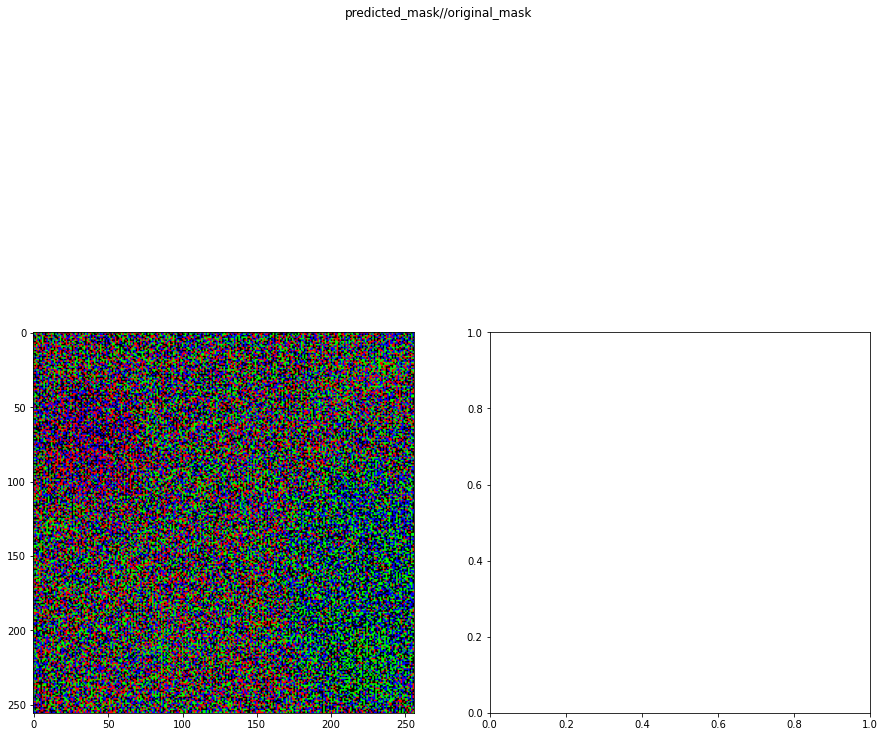

In [ ]:
def decode_mask(img):
  #print(img.shape)
  n_classes, h, w = img.shape
  #print(img[0])
  ret = np.empty((w, h, 3), dtype=np.uint8)
  ret[:, :, 0] = im
  ret[:, :, 1] = im
  ret[:, :, 2] = im
  return ret
  return np.dot(img, [255, 255/2, 255/3])

# Define the helper function
def decode_segmap(image, nc=4):
  
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (255, 0, 0), (0, 255, 0), (0, 0, 255)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  return rgb
  

# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    
    fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,15))
    fig.suptitle('predicted_mask//original_mask')
    
    for images, labels in test_generator:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        outputs = outputs.cpu()
        om = torch.argmax(outputs.squeeze(), dim=0).detach().cpu().numpy()        
        ax1.imshow(decode_segmap(om[0]))
        mask = labels.detach().cpu().numpy()
        print(mask.shape)
        ax2.imshow(decode_segmap(mask))
        break

    print('Test Accuracy of the model test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

In [ ]:
# start prediction
predictions = []
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,15))
fig.suptitle('predicted_mask//original_mask')
for i, batch in enumerate(test_generator):
    images, mask_target = batch
    batch_preds = torch.sigmoid(model(images.to(device)))
    batch_preds = batch_preds.detach().cpu().numpy()
    print(batch_preds[0])
    ax1.imshow(np.squeeze(decoded),cmap='gray')
    ax2.imshow(np.squeeze(mask_target),cmap='gray')
    break